In this part, we statistically try to prove a hypothesis that seems to be quite obvious at first glance. The research question we pose is simply: "Does Better Learning Lead to Better Retention?
"

Hence, we can formally state the quesetion posed above as the following hypothesis:

- **$H_0$:** Points obtained by a subject in the learning task is unrelated to their performance in the memory task. <br>


- **$H_1$:** There is no relation between the magnitute of reward associated with a particular stimulus and the memory associated with the stimulus. 
<br>

In [115]:
# Importing Libraries and the Datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_learning = e1_learning.dropna()

e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")
e1_memory = e1_memory.dropna()

In [116]:
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [117]:
e1_memory.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0


In [118]:
SubjectID_PointsLearning = {}

for index, row in e1_learning.iterrows():
    if row['subject_id'] not in SubjectID_PointsLearning:
        SubjectID_PointsLearning[row['subject_id']] = row['points']
    else:
        SubjectID_PointsLearning[row['subject_id']] += row['points']

SubjectID_PointsMemory = {}

for index,row in e1_memory.iterrows():
    if row['subject_id'] not in SubjectID_PointsMemory:
        SubjectID_PointsMemory[row['subject_id']] = row['mem_acc']
    else:
        SubjectID_PointsMemory[row['subject_id']]+= row['mem_acc']



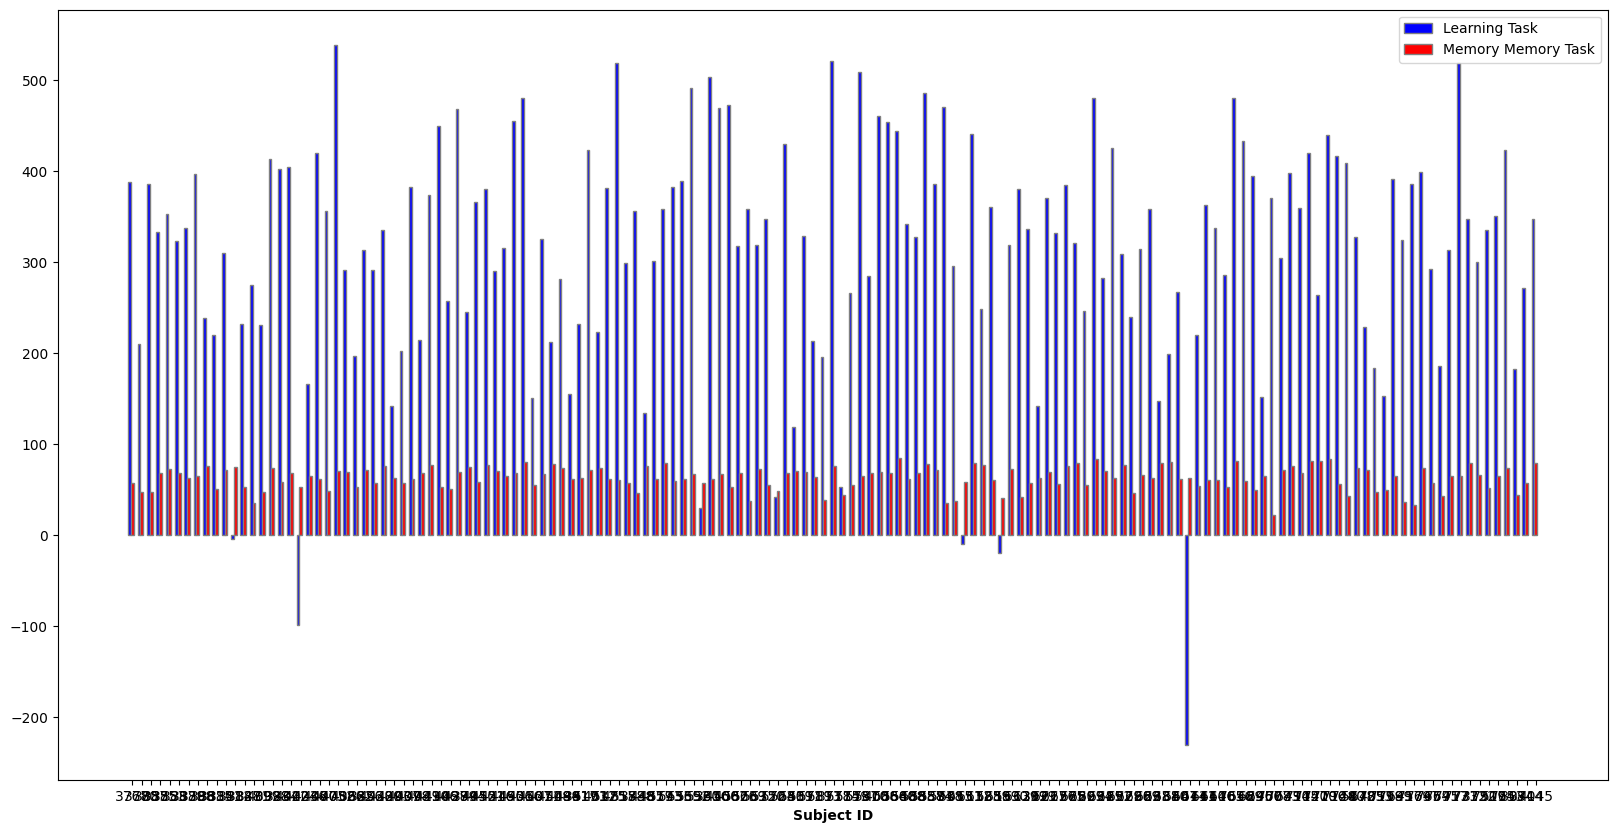

In [119]:
# Depict the scores of each subject in the learning phase and memory phase side by side in a bar graph
plt.figure(figsize=(20,10))
barWidth = 0.3
r1 = np.arange(len(SubjectID_PointsLearning))
r2 = [x + barWidth for x in r1]
plt.bar(r1, SubjectID_PointsLearning.values(), color='b', width=barWidth, edgecolor='grey', label='Learning Task')
plt.bar(r2, SubjectID_PointsMemory.values(), color='r', width=barWidth, edgecolor='grey', label='Memory Memory Task')
plt.xlabel('Subject ID', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(SubjectID_PointsLearning))], SubjectID_PointsLearning.keys())
plt.legend()
plt.show()

In [120]:
# find the correlation between the scores of the learning phase and memory phase
learning_points = []
memory_points = []
for key in SubjectID_PointsLearning.keys():
    learning_points.append(SubjectID_PointsLearning[key])
    memory_points.append(SubjectID_PointsMemory[key])


import numpy as np
from scipy import stats

# Assuming you have the scores stored in two lists: learning_points and memory_points

# Check for normality assumption using Shapiro-Wilk test
shapiro_learning = stats.shapiro(learning_points)
shapiro_memory = stats.shapiro(memory_points)

# Print the results of normality tests
print("Shapiro-Wilk test for normality - Learning Points:", shapiro_learning)
print("Shapiro-Wilk test for normality - Memory Points:", shapiro_memory)

# Check if assumptions are met before proceeding with the correlation test
if shapiro_learning.pvalue > 0.05 and shapiro_memory.pvalue > 0.05:
    # If assumptions are met, conduct Pearson correlation test
    correlation_coefficient, p_value = stats.pearsonr(learning_points, memory_points)
    print("Pearson correlation coefficient:", correlation_coefficient)
    print("p-value:", p_value)
else:
    # If assumptions are not met, consider using alternative tests or transformations
    print("Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.")



Shapiro-Wilk test for normality - Learning Points: ShapiroResult(statistic=0.9414759874343872, pvalue=6.4031323745439295e-06)
Shapiro-Wilk test for normality - Memory Points: ShapiroResult(statistic=0.9701274633407593, pvalue=0.00226794695481658)
Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.


In [121]:
# Check for equality of variances assumption using Levene's test
levene_test = stats.levene(learning_points, memory_points)
print("Levene's test for equality of variances:", levene_test)

Levene's test for equality of variances: LeveneResult(statistic=141.21902772104866, pvalue=5.990290035862862e-27)


Visualisation of the Scores by each subject in both tasks:

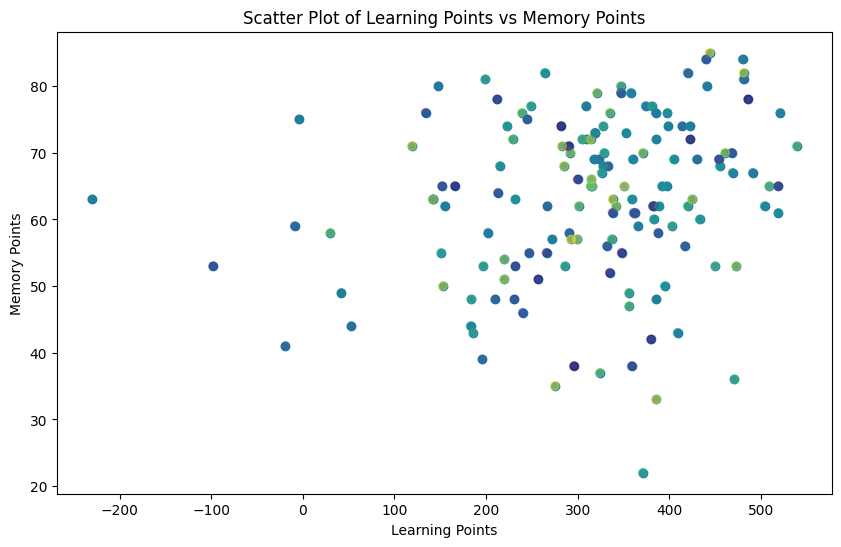

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(learning_points, memory_points)
colors = np.random.rand(len(learning_points))
plt.scatter(learning_points, memory_points, c=colors, alpha=0.5)
plt.xlabel("Learning Points")
plt.ylabel("Memory Points")
plt.title("Scatter Plot of Learning Points vs Memory Points")
plt.show()

#### Below is the code to check and see if we can transform the data to use parametric tests,

In [123]:
learning_points_log = np.log(learning_points)
memory_points_log = np.log(memory_points)

# Square root transformation
learning_points_sqrt = np.sqrt(learning_points)
memory_points_sqrt = np.sqrt(memory_points)

# Reciprocal transformation
learning_points_reciprocal = 1 / np.array(learning_points)
memory_points_reciprocal = 1 / np.array(memory_points)

# Check for normality assumption using Shapiro-Wilk test
shapiro_learning_log = stats.shapiro(learning_points_log)
shapiro_memory_log = stats.shapiro(memory_points_log)

shapiro_learning_sqrt = stats.shapiro(learning_points_sqrt)
shapiro_memory_sqrt = stats.shapiro(memory_points_sqrt)

shapiro_learning_reciprocal = stats.shapiro(learning_points_reciprocal)
shapiro_memory_reciprocal = stats.shapiro(memory_points_reciprocal)

# Print the results of normality tests
print("Shapiro-Wilk test for normality - Learning Points (Log):", shapiro_learning_log)
print("Shapiro-Wilk test for normality - Memory Points (Log):", shapiro_memory_log)
print("Shapiro-Wilk test for normality - Learning Points (Square Root):", shapiro_learning_sqrt)
print("Shapiro-Wilk test for normality - Memory Points (Square Root):", shapiro_memory_sqrt)
print("Shapiro-Wilk test for normality - Learning Points (Reciprocal):", shapiro_learning_reciprocal)
print("Shapiro-Wilk test for normality - Memory Points (Reciprocal):", shapiro_memory_reciprocal)

# Check if assumptions are met before proceeding with the correlation test
if shapiro_learning_log.pvalue > 0.05 and shapiro_memory_log.pvalue > 0.05:
    # If assumptions are met, conduct Pearson correlation test
    correlation_coefficient_log, p_value_log = stats.pearsonr(learning_points_log, memory_points_log)
    print("Pearson correlation coefficient (Log):", correlation_coefficient_log)
    print("p-value (Log):", p_value_log)
else:
    # If assumptions are not met, consider using alternative tests or transformations
    print("Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.")

if shapiro_learning_sqrt.pvalue > 0.05 and shapiro_memory_sqrt.pvalue > 0.05:
    # If assumptions are met, conduct Pearson correlation test
    correlation_coefficient_sqrt, p_value_sqrt = stats.pearsonr(learning_points_sqrt, memory_points_sqrt)
    print("Pearson correlation coefficient (Square Root):", correlation_coefficient_sqrt)
    print("p-value (Square Root):", p_value_sqrt)
else:
    # If assumptions are not met, consider using alternative tests or transformations
    print("Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.")

if shapiro_learning_reciprocal.pvalue > 0.05 and shapiro_memory_reciprocal.pvalue > 0.05:
    # If assumptions are met, conduct Pearson correlation test
    correlation_coefficient_reciprocal, p_value_reciprocal = stats.pearsonr(learning_points_reciprocal, memory_points_reciprocal)
    print("Pearson correlation coefficient (Reciprocal):", correlation_coefficient_reciprocal)
    print("p-value (Reciprocal):", p_value_reciprocal)
else:
    # If assumptions are not met, consider using alternative tests or transformations
    print("Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.")




Shapiro-Wilk test for normality - Learning Points (Log): ShapiroResult(statistic=nan, pvalue=1.0)
Shapiro-Wilk test for normality - Memory Points (Log): ShapiroResult(statistic=0.9075700640678406, pvalue=3.335286180572439e-08)
Shapiro-Wilk test for normality - Learning Points (Square Root): ShapiroResult(statistic=nan, pvalue=1.0)
Shapiro-Wilk test for normality - Memory Points (Square Root): ShapiroResult(statistic=0.9458287954330444, pvalue=1.4064130482438486e-05)
Shapiro-Wilk test for normality - Learning Points (Reciprocal): ShapiroResult(statistic=0.17458420991897583, pvalue=1.7864961909395768e-25)
Shapiro-Wilk test for normality - Memory Points (Reciprocal): ShapiroResult(statistic=0.7769502401351929, pvalue=6.92989773638103e-14)
Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.
Assumptions for Pearson correlation test not met. Consider using alternative tests or transformations.
Assumptions for Pearson correlation test not met

/var/folders/6l/f9q22pxj0mqbqzt40lzxdffw0000gn/T/ipykernel_32899/2343840992.py:1: RuntimeWarning: invalid value encountered in log
  learning_points_log = np.log(learning_points)
/var/folders/6l/f9q22pxj0mqbqzt40lzxdffw0000gn/T/ipykernel_32899/2343840992.py:5: RuntimeWarning: invalid value encountered in sqrt
  learning_points_sqrt = np.sqrt(learning_points)


Since we cannot transform the data to a normal and homogenous distribution, we shall go with a non parametric test such as Spearman's rank correlation.

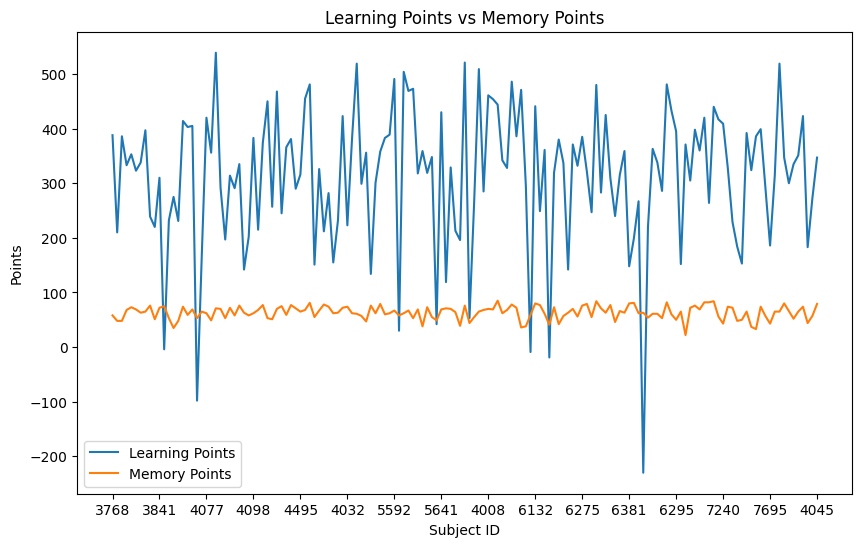

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(learning_points, label='Learning Points')
plt.plot(memory_points, label='Memory Points')
plt.xlabel("Subject ID")
# put subject id on x-axis,it is avaiable as the keys of the dictionary
#  plot only evey 100th subject id
plt.xticks(range(0, len(SubjectID_PointsLearning), 10), list(SubjectID_PointsLearning.keys())[::10])
plt.ylabel("Points")
plt.title("Learning Points vs Memory Points")
plt.legend()
plt.show()


In [125]:
spearman_corr, spearman_pvalue = stats.spearmanr(learning_points, memory_points)

# Print the Spearman correlation coefficient and p-value
print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_pvalue)

Spearman correlation coefficient: 0.21751832346177943
p-value: 0.007298668187811306


The Spearman correlation coefficient(ρ) measures the strength and direction of the monotonic relationship between two variables. The coefficient, which came out to be 0.218 suggests a relatively weak positive monotonic relationship between learning points and memory points.

However, the p-value which is approximately 0.0073, is less than the conventional significance level of 0.05, suggesting that there is a statistically significant correlation between learning points and memory points.

In summary, while the correlation between learning points and memory points is not extremely strong, it is statistically significant, suggesting that there is indeed a relationship between performance on the learning task and performance on the memory task.

### Conclusion

We can see that there is a slight positive, statistically significant correlation between learning and memory. The subjects who performed better in the learning task also did well in the memory task.

In [126]:
##IGNORE, PARAMETRIC TESTS NOT VALID

# import numpy as np
# from scipy import stats

# # Assuming you have populated learning_points and memory_points lists

# # Calculate the beta coefficient
# slope, intercept, r_value, p_value, std_err = stats.linregress(learning_points, memory_points)
# beta_coefficient = slope
# standard_error = std_err

# print("Beta coefficient:", beta_coefficient)
# print("Standard error:", standard_error)


In [127]:
# from scipy.stats import f_oneway

# # Assuming you have populated learning_points and memory_points lists

# # Conduct ANOVA test
# f_statistic, p_value_anova = f_oneway(learning_points, memory_points)

# print("F-statistic:", f_statistic)
# print("p-value (ANOVA):", p_value_anova)


Now, we can also conduct a multiple regression analysis to study the effects of two independent variables on one dependent variable. We wish to see how Performance on the memory task is affected by two variables: block condition, and the performance on the learning task.

In [128]:
# Importing Libraries and the Datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_learning = e1_learning.dropna()

e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")
e1_memory = e1_memory.dropna()

In [131]:
e1_learning_b1 = e1_learning[e1_learning['block_condition'] == 1]
e1_learning_b2 = e1_learning[e1_learning['block_condition'] == 2]
e1_memory_b1 = e1_memory[e1_memory['block_condition'] == 1]
e1_memory_b2 = e1_memory[e1_memory['block_condition'] == 2]



SubjectID_PointsLearning_b1 = {}
SubjectID_PointsLearning_b2 = {}

for index, row in e1_learning_b1.iterrows():
    if row['subject_id'] not in SubjectID_PointsLearning_b1:
        SubjectID_PointsLearning_b1[row['subject_id']] = row['points']
    else:
        SubjectID_PointsLearning_b1[row['subject_id']] += row['points']

for index, row in e1_learning_b2.iterrows():
    if row['subject_id'] not in SubjectID_PointsLearning_b2:
        SubjectID_PointsLearning_b2[row['subject_id']] = row['points']
    else:
        SubjectID_PointsLearning_b2[row['subject_id']] += row['points']
        

SubjectID_PointsMemory_b1 = {}
SubjectID_PointsMemory_b2 = {}

for index,row in e1_memory.iterrows():
    if row['subject_id'] not in SubjectID_PointsMemory_b1:
        SubjectID_PointsMemory_b1[row['subject_id']] = row['mem_acc']
    else:
        SubjectID_PointsMemory_b1[row['subject_id']]+= row['mem_acc']

for index,row in e1_memory.iterrows():
    if row['subject_id'] not in SubjectID_PointsMemory_b2:
        SubjectID_PointsMemory_b2[row['subject_id']] = row['mem_acc']
    else:
        SubjectID_PointsMemory_b2[row['subject_id']]+= row['mem_acc']



In [132]:
import pandas as pd
import statsmodels.api as sm

# Create DataFrames for each block condition for learning and memory tasks
df_b1 = pd.DataFrame({'SubjectID': list(SubjectID_PointsLearning_b1.keys()),
                      'Learning_Scores_b1': list(SubjectID_PointsLearning_b1.values()),
                      'Memory_Scores_b1': list(SubjectID_PointsMemory_b1.values())})
df_b2 = pd.DataFrame({'SubjectID': list(SubjectID_PointsLearning_b2.keys()),
                      'Learning_Scores_b2': list(SubjectID_PointsLearning_b2.values()),
                      'Memory_Scores_b2': list(SubjectID_PointsMemory_b2.values())})

# Merge the DataFrames on SubjectID
data = pd.merge(df_b1, df_b2, on='SubjectID', suffixes=('_b1', '_b2'))

# Perform multiple regression analysis
X = sm.add_constant(data[['Learning_Scores_b1', 'Learning_Scores_b2']])
model = sm.OLS(data['Memory_Scores_b1'], X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Memory_Scores_b1   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.735
Date:                Fri, 03 May 2024   Prob (F-statistic):            0.00399
Time:                        19:19:35   Log-Likelihood:                -587.14
No. Observations:                 151   AIC:                             1180.
Df Residuals:                     148   BIC:                             1189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0842      2

Based on the multiple regression analysis conducted on the data, we can see that learning scores in block condition 2 significantly influenced memory scores, with a coefficient of 0.0412 (p = 0.001). However, learning scores in block condition 1 did not show a significant effect on memory scores (coefficient = -0.0096, p = 0.558). This suggests that the impact of learning performance on subsequent memory tasks may vary depending on the block condition in which the learning task was conducted (Exemplar Stimuli causes greater scores in the memory task, as compared to categorical). The overall regression model was statistically significant (F-statistic = 5.735, p = 0.00399), indicating that the independent variables collectively explained a significant portion of the variance in memory scores. However, the model's adjusted R-squared value was low (0.059), indicating that only a small proportion of the variance in memory scores was accounted for by the predictors included in the model. These findings highlight the importance of considering contextual factors, such as block condition, when investigating the relationship between learning and memory performance. Further research may be warranted to explore additional factors that could contribute to variations in memory performance across different learning contexts.

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

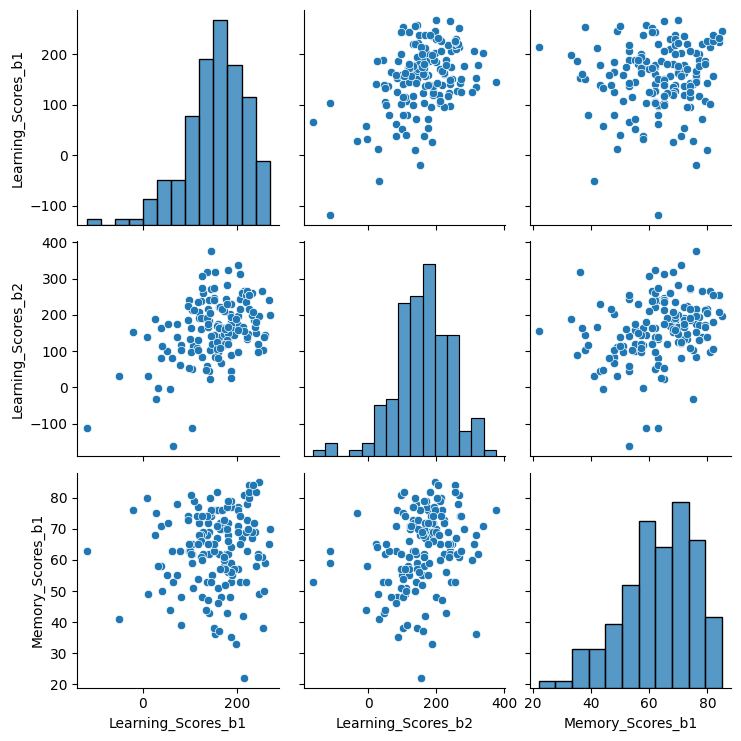

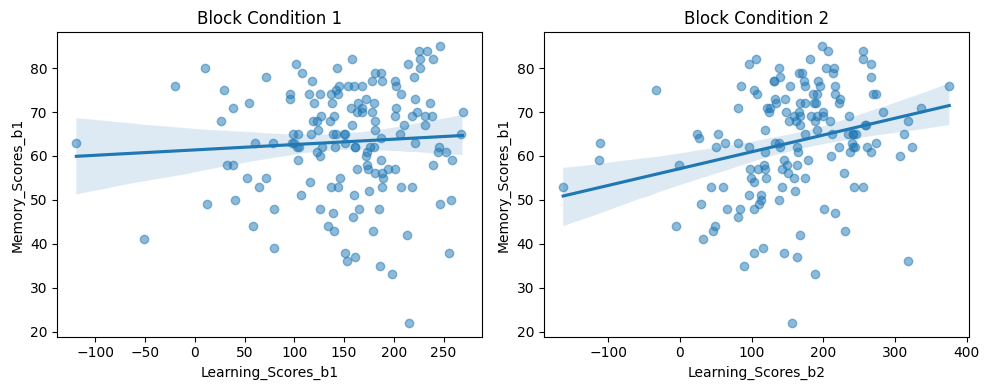

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot matrix
sns.pairplot(data, vars=['Learning_Scores_b1', 'Learning_Scores_b2', 'Memory_Scores_b1'])

# Add regression lines
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.regplot(x='Learning_Scores_b1', y='Memory_Scores_b1', data=data, scatter_kws={'alpha':0.5})
plt.title('Block Condition 1')

plt.subplot(1, 2, 2)
sns.regplot(x='Learning_Scores_b2', y='Memory_Scores_b1', data=data, scatter_kws={'alpha':0.5})
plt.title('Block Condition 2')

plt.tight_layout()
plt.show()
